In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
# api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
# ticker = 'ATEX'
ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

ticker and stock data

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,AAPL
Date,
2022-12-01 00:00:00-05:00,129.731918
2023-01-01 00:00:00-05:00,144.070023
2023-02-01 00:00:00-05:00,153.710007


change index to add in metriks df

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.tail(3)

,AAPL
Date_index,
2022-12-01,129.731918
2023-01-01,144.070023
2023-02-01,153.710007


In [7]:
''' добавляем цифру к году, чтобы видень данные как начало года, а не как факт '''
def change_index_plus_one(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        df_index[i] = str(int(df_index[i])+1)
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

key_metrics

In [8]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr = change_index_plus_one(df_key_metr)
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,FY,24.317273,6.154614,7.532763,6.872426,2.978793,3.124822,3.124822,3.124822,7.585118,2423475620080.514648,2519898620080.514648,24.282593,6.145837,19.839998,21.746324,47.826721,47.826721,6.390362,18.926968,20.629374,22.611547,0.041182,0.045985,1.952933,0.856354,0.724234,0.879356,40.749574,1.223921,0.006124,0.148703,0,0.066571,0,-0.087662,-0.027155,-0.964337,0.02292,20.801964,0.600871,0.282924,-12.679296,-18577000000,None,-166678000000,2.369533,56219000000,59439000000,5763000000,56.400205,104.685277,8.075698,6.471608,3.486641,45.197331,1.969589,-0.660337
2022,FY,21.903541,5.669029,6.229346,5.565624,3.750553,3.777557,3.777557,3.777557,7.626006,2482477060059.236816,2572256060059.236816,26.219656,6.786117,23.861253,26.706799,39.348186,39.348186,7.031538,20.889554,24.724198,27.672652,0.038139,0.037444,1.729371,0.820257,0.729104,1.074553,41.190548,1.098838,0.005828,0.152799,0,0.059904,0,-0.106548,-0.030302,-0.982364,0.021612,21.950838,0.483099,0.269742,-10.978415,9355000000,None,-153076000000,1.976843,51506000000,54763000000,6580000000,51.390969,93.851071,11.276593,7.102415,3.88914,32.367933,1.500713,-0.663722
2021,FY,15.820258,3.308587,4.64923,4.228014,5.241031,3.765477,3.765477,3.765477,6.64524,1996361344741.568848,2070781344741.568848,34.773151,7.272322,24.746031,27.211359,30.553901,30.553901,7.543418,25.558891,25.66851,28.225739,0.028758,0.036749,1.510078,0.798267,0.918539,1.363604,23.072746,1.405201,0.007053,0.245267,0,0.06831,0,-0.090599,-0.026625,-0.661089,0.024877,16.742586,0.303383,0.177256,-7.923629,38321000000,None,-114836000000,1.72081,44475500000,48529500000,5320500000,49.787534,91.04819,8.741883,7.331152,4.008866,41.753016,0.878664,-0.421217


In [9]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [10]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        # x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [11]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

add_percent_columns

In [12]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

In [18]:
df_with_changes_key

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,AAPL,SNP,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % AAPL,change % SNP
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999,0.401933,0.020905,0.052432,0.048643,0.155604,0.111088,0.111088,0.111088,0.068736,4685072776.832001,4158072776.832001,15.162048,0.7886,6.045255,6.516096,2.853272,2.853272,0.699894,8.283013,5.365255,5.783133,0.065954,0.153466,0.580999,0.61716,-1.049801,2.432895,4.209677,2.508091,None,0,0,0.05218,0,-0.072258,-0.009426,-0.504505,0,0.228587,0.094258,0.072045,0.02762,2178000000,None,1051000000,0.580999,26230500000,27741000000,3329000000,58.672782,58.815554,6.380547,6.220942,6.205841,57.205128,0.188185,-0.003789,0.312995,1279.640015,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
2000,0.382572,0.037484,0.049771,0.046839,0.201203,0.193594,0.193594,0.193594,0.021642,10665203371.535999,9639203371.535999,17.745763,1.738703,13.364917,14.201336,3.435955,3.435955,1.571438,11.929707,12.079202,12.835158,0.056351,0.070416,0.096649,0.398566,-1.269802,2.766301,7.638298,1.327787,None,0,0,0.05119,0,-0.058897,-0.007662,-0.552941,0,0.404072,0.099391,0.

Vizualization key_metrics

In [13]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

In [14]:
df_test = df_with_changes_key[[ticker, f'change % {ticker}']]
df_test

,AAPL,change % AAPL
Date_index,,
1999,0.312995,0.000000
2000,0.788424,151.896484
2001,0.328669,-58.313217
2002,0.375708,14.312163
2003,0.218252,-41.909316
2004,0.342879,57.102691
2005,1.168768,240.868849
2006,2.295285,96.385007
2007,2.605942,13.534597


In [15]:
def get_data_from_ticker_wuth_up_end(tick, s_date, interval='1mo'):

    f_date = str(int(s_date[:4]) + 1)

    ticker = yf.Ticker(tick)

    df = ticker.history(start=s_date, end=f'{f_date}{s_date[4:]}', interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

x = get_data_from_ticker_wuth_up_end('AAPL', '2017-11-03')

,AAPL
Date,
2017-12-01 00:00:00-05:00,40.168858
2018-01-01 00:00:00-05:00,39.741600
2018-02-01 00:00:00-05:00,42.279007
2018-03-01 00:00:00-05:00,39.987053
2018-04-01 00:00:00-04:00,39.386452
2018-05-01 00:00:00-04:00,44.536781
2018-06-01 00:00:00-04:00,44.287430
2018-07-01 00:00:00-04:00,45.526749
2018-08-01 00:00:00-04:00,54.460320


In [16]:
''' necessary columns '''

km0 = f'{ticker}'
km1 = f'change % {ticker}'
km2 = 'SNP'
km3 = 'change % SNP'
km4 = 'change % debtToAssets'

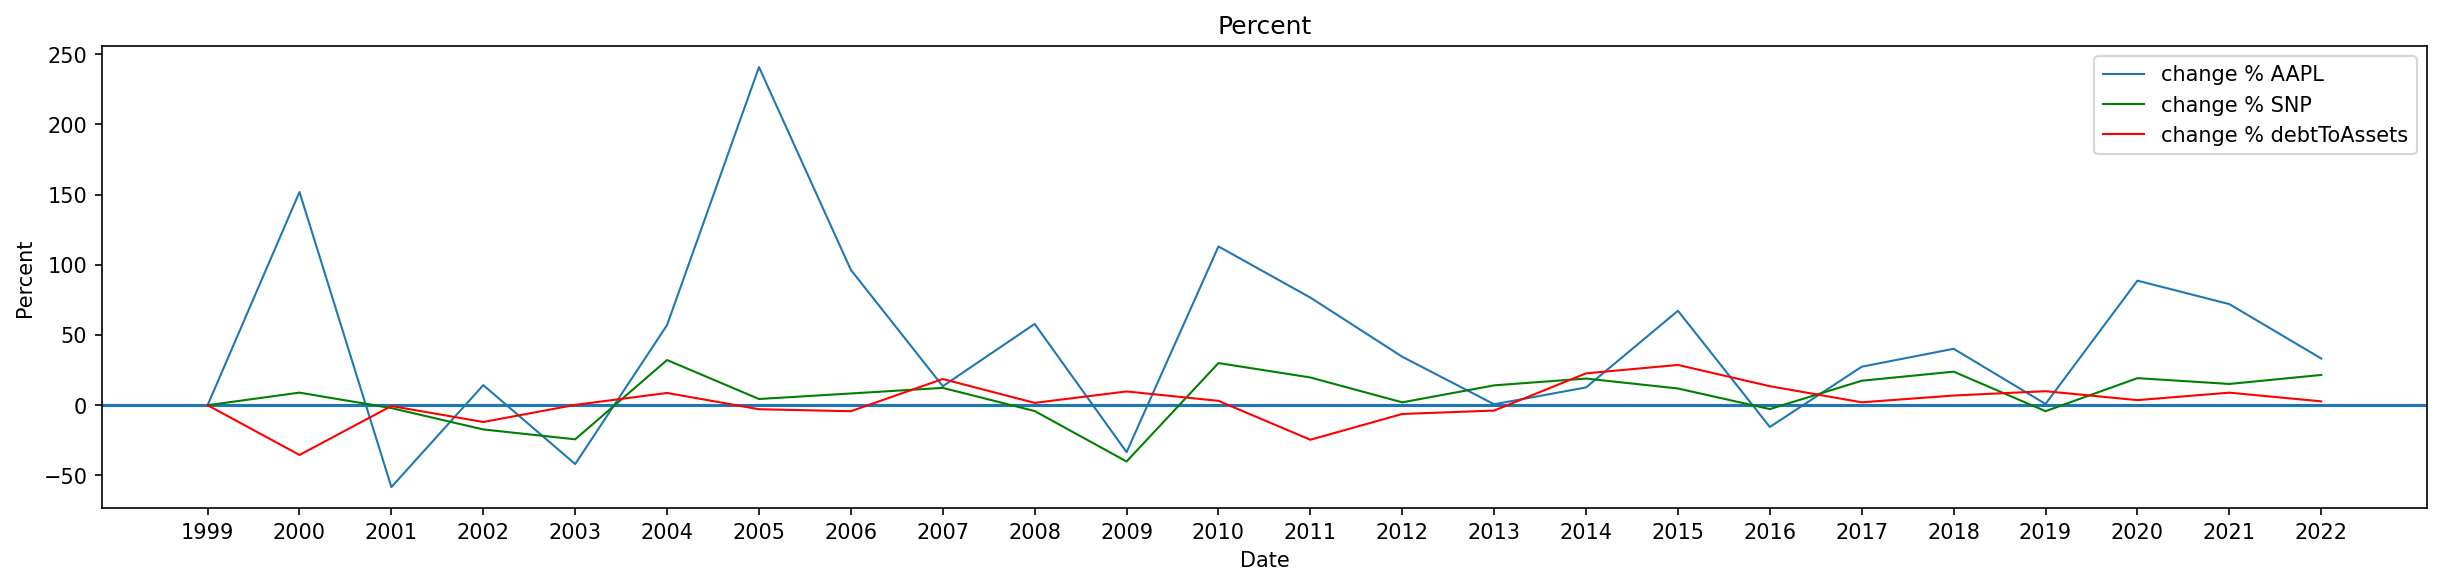

In [17]:
# plot size
figure(figsize=(20,4), dpi=150)
plt.axhline(y=0, linestyle='-')


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[km1],lw=1, label=km1)
plt.plot(df_with_changes_key[km3],'g',lw=1, label=km3)
plt.plot(df_with_changes_key[km4],'r',lw=1, label=km4)

# Add a legend to the axis
plt.legend()

plt.show()